<a href="https://colab.research.google.com/github/gdevakumar/PyTorch_Practice/blob/main/pretrained_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's see how to use PyTorch to load large scale pre-trained vision models(like *AlexNet*, *ResNet* etc)
for working with image classification and try it on custom images.
Assuming you have all the libraries and setup to run this code.

In [1]:
import torch
import torchvision
from torchvision.models import resnet101, ResNet101_Weights
from torchvision.io import read_image
from PIL import Image

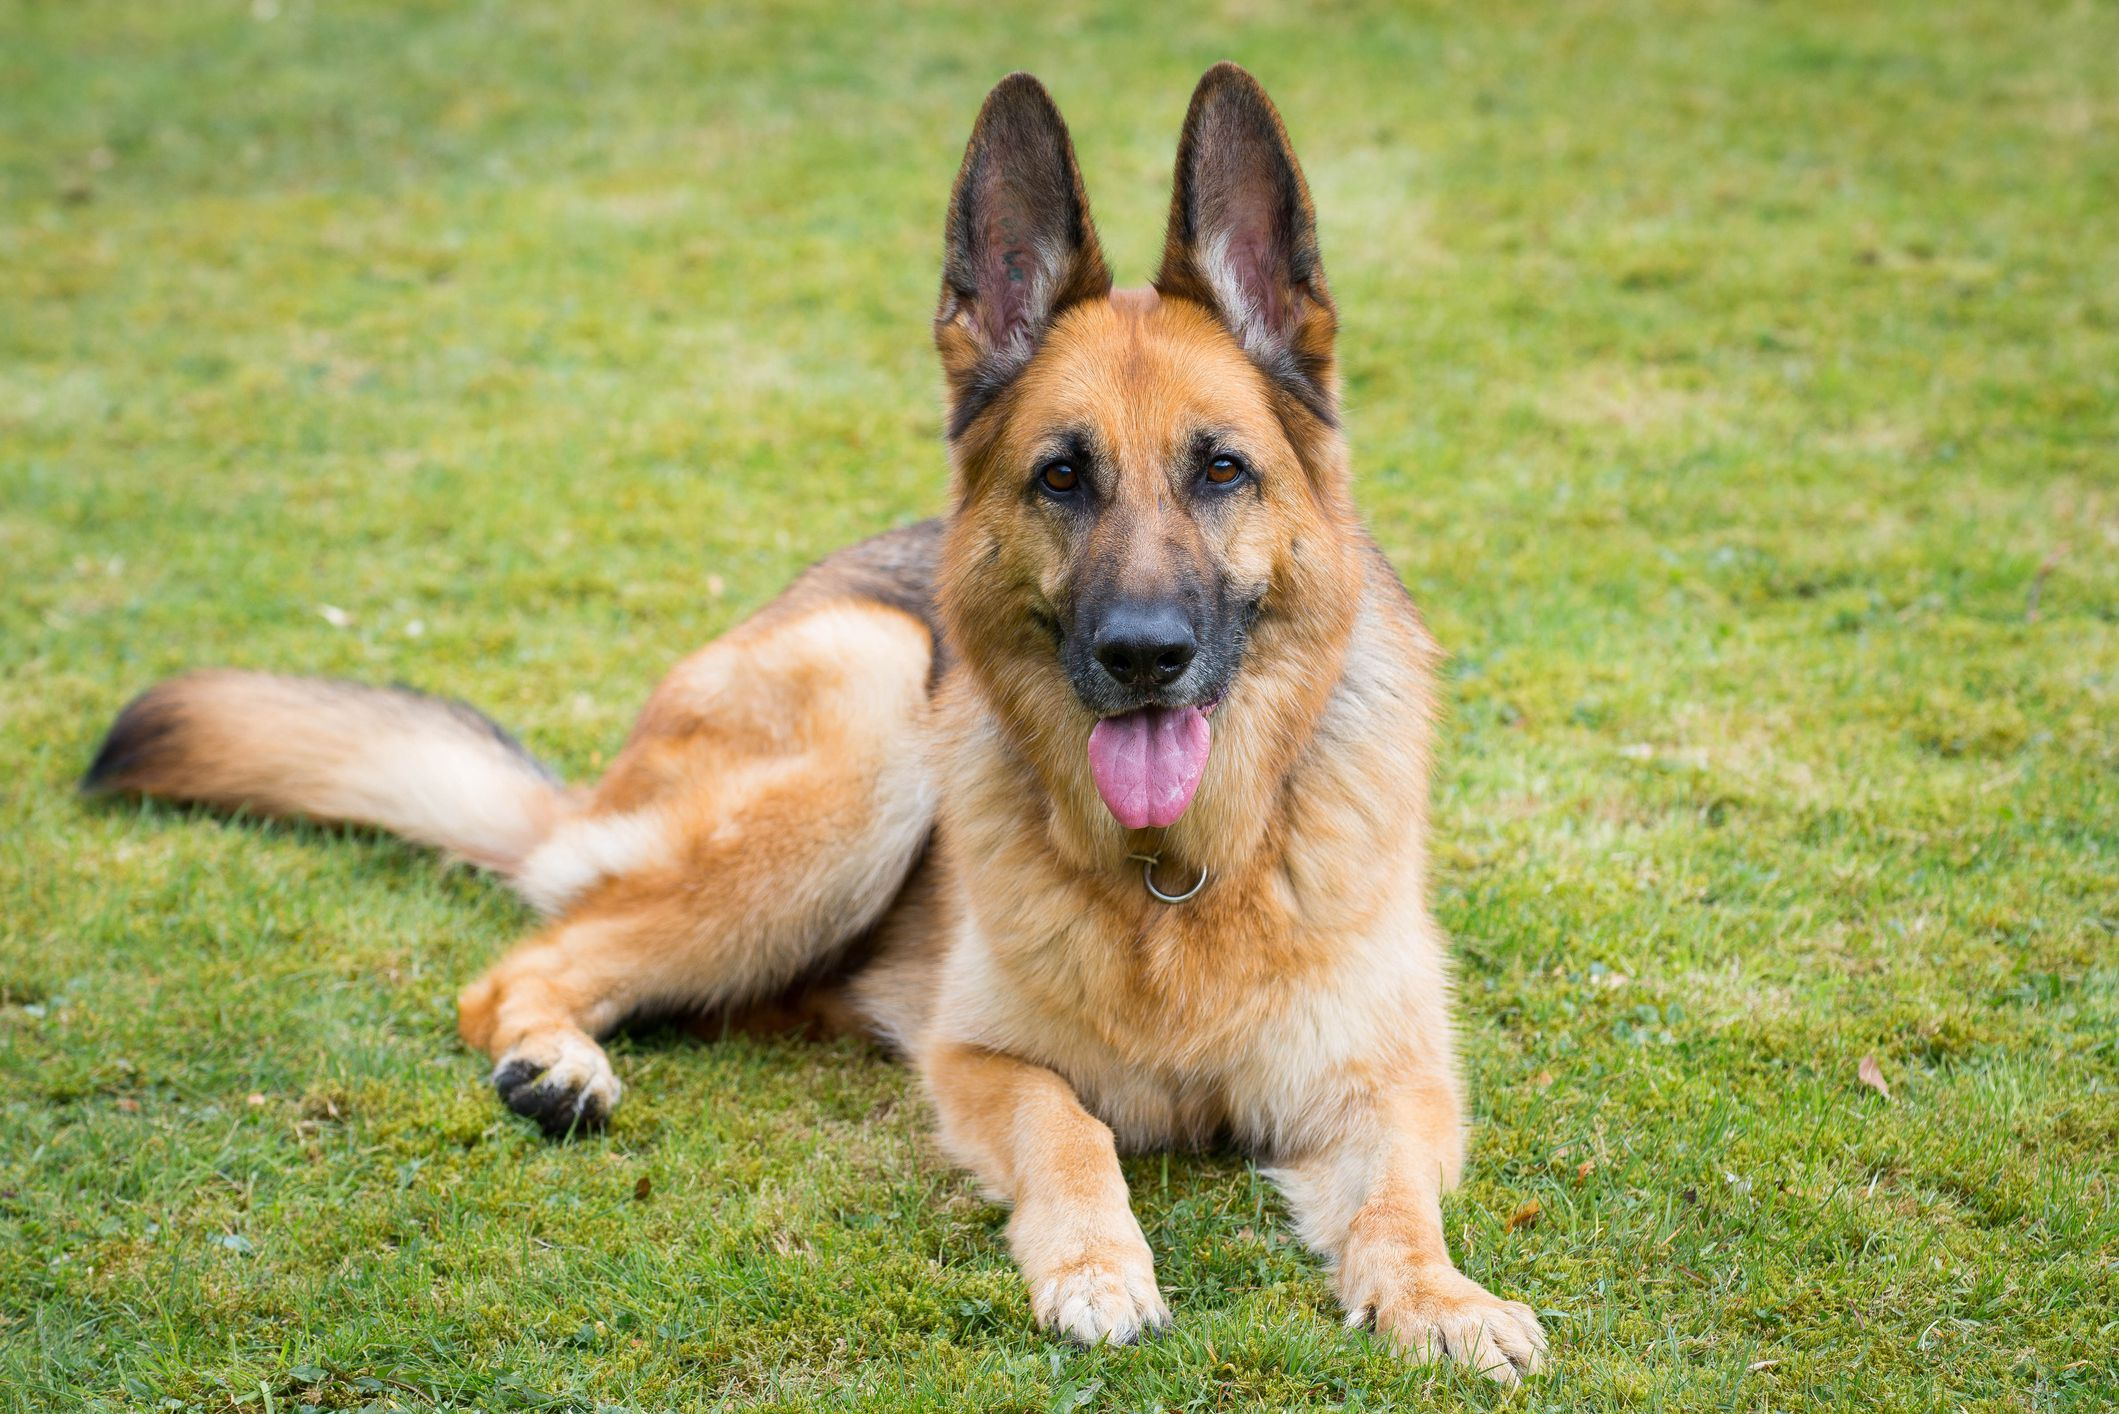

In [2]:
# Storing the model weights
weight = ResNet101_Weights.DEFAULT

# Loading the pretrained model along with weights
model = resnet101(weights = weight)

# Set the model in Inference mode to evaluate custom images
model.eval()

# Read your sample image
IMAGE_PATH = "/content/shephy.jpg"
img = read_image(IMAGE_PATH)
Image.open(IMAGE_PATH)

In [3]:
# All input images must be preprocessed similar to training images used to train model
# All the required preprocessing is available in model weights object
preprocess = weight.transforms()

processed_img = preprocess(img).unsqueeze(0)

# Pass the image to neural network
output = model(processed_img)

# Get the index of max value
_, max_idx = torch.max(output, 1)

# Class name is found in meta data stored in weights object
predicted_class = weight.meta['categories'][max_idx.item()]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [4]:
print(f"Predicted Class of Image: {predicted_class}")

Predicted Class of Image: German shepherd
